In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# cd /content/drive/My Drive/'Colab Notebooks'/
cd /content/drive/My Drive/Walmart_Competition 

/content/drive/My Drive/Walmart_Competition


In [3]:
ls

features.csv                          RF_pickle_model.pkl
Keras_pickle_model.pkl                sampleSubmission.csv
Linear_Regression.ipynb               stores.csv
Linear_Regression_NN.ipynb            test.csv
LR_Regularization_Dropout_Adam.ipynb  train.csv
ML_models.ipynb                       Walmart_Comp.ipynb


In [0]:
# Imports
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Sklearn Imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb

In [6]:
# Keras Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
df_features = pd.read_csv('features.csv')
df_stores = pd.read_csv('stores.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [0]:
data_frame = pd.merge(df_train,df_features,on=['Store','Date','IsHoliday'])

In [0]:
data_frame = pd.merge(data_frame,df_stores,on='Store')

In [0]:
data_frame.fillna(0,inplace=True)

In [11]:
data_frame.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [0]:
data_frame["Weekly_Sales"] = np.where(data_frame["Weekly_Sales"] < 0,0,data_frame["Weekly_Sales"])
data_frame["MarkDown2"] = np.where(data_frame["MarkDown2"] < 0,0,data_frame["MarkDown2"])
data_frame["MarkDown3"] = np.where(data_frame["MarkDown3"] < 0,0,data_frame["MarkDown3"])

In [13]:
data_frame["Type"].unique()

array(['A', 'B', 'C'], dtype=object)

In [0]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame["Year"] = data_frame["Date"].dt.year
data_frame["Month"] = data_frame["Date"].dt.month
data_frame["Day"] = data_frame["Date"].dt.day

In [0]:
data_frame = data_frame.drop("Date",axis=1)

In [0]:
data_frame["IsHoliday"] = data_frame["IsHoliday"].astype(int)
wmae_feature = data_frame["IsHoliday"].values

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame["Type"] = le.fit_transform(data_frame["Type"])

In [0]:
y = data_frame["Weekly_Sales"].values
#X = data_frame.drop("Weekly_Sales",axis=1)
X = data_frame.drop(["Weekly_Sales","IsHoliday","CPI","Unemployment","MarkDown1","Year"],axis=1)

In [19]:
#y = data_frame["Weekly_Sales"].values
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
min_max = MinMaxScaler()
X = min_max.fit_transform(X)
y = y.reshape(-1,1)
y = min_max.fit_transform(y)
#print(type(X))
X = np.array(X)
y = np.array(y)
print(X.shape,y.shape)

(421570, 12) (421570, 1)


In [20]:
y.max()

1.0

In [21]:
"""from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,criterion='mse')
rf.fit(X,y)
(pd.DataFrame([X.columns,rf.feature_importances_],columns=['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'year', 'month', 'day']).T).plot.bar()"""

"from sklearn.ensemble import RandomForestRegressor\nrf = RandomForestRegressor(n_estimators=50,criterion='mse')\nrf.fit(X,y)\n(pd.DataFrame([X.columns,rf.feature_importances_],columns=['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',\n       'Unemployment', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',\n       'MarkDown4', 'MarkDown5', 'year', 'month', 'day']).T).plot.bar()"

In [0]:
def ANN(learning_rate):
  adam = Adam(lr = learning_rate)
  classifier = Sequential()
  classifier.add(Dense(units = 7, activation = 'relu', 
                      kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=37), input_dim = 12))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(units = 7, activation = 'relu', 
                      kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=37)))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(units = 1, activation = None, 
                      kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=37)))
  classifier.compile(optimizer = adam, loss = 'mean_squared_error',
                    metrics = ['accuracy'])
  print(classifier.summary())
  return classifier

In [0]:
def train_val_model():
  learning_rate = 0.009  # Used for Adam Optimizer
  iterr = 20 # Number of Epochs
  n_folds = 5 # Number of folds for Cross Validation
  bsize = 128  # Batch Size
  train_acc, val_acc = [], [] # Lists for storing accuracies on each fold
  # Cross validation
  kfold = KFold(n_splits=n_folds, shuffle=True, random_state=7)
  hist = []
  val_hist=[]
  acc=[]
  val_acc=[]
  for train, val in kfold.split(X, y):
    X_train, X_val = X[train], X[val] # Grabbing X_train, X_val for Models
    y_train, y_val = y[train], y[val] # Grabbiing y_train, y_val for Models
    ann_model = ANN(learning_rate)
    history = ann_model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=iterr, batch_size=bsize, verbose=1)
    y_pred_ann = ann_model.predict(X_val)
    print("Y_pred_ann values", y_train.mean(),y_pred_ann.max(), y_pred_ann.mean(),y_pred_ann)
    print("R2 scores: ",r2_score(y_val,y_pred_ann))
    print("MSE value: ",mean_squared_error(y_val,y_pred_ann))
    #print(history.history.keys())
    hist.append(history.history['loss'])
    val_hist.append(history.history['val_loss'])
    acc.append(history.history['acc'])
    val_acc.append(history.history['val_acc'])
    
    plt.figure()
    plt.subplot(121)
    # For Plotting, X_axis: Number of Epochs, Y_axis = Loss
    plt.title("Trainig Loss")
    plt.plot(history.history['loss'])
    plt.subplot(122)
    plt.title("Validation Loss")
    plt.plot(history.history['val_loss'])
    plt.show()
    pkl_filename = "Keras_pickle_model.pkl"
    with open(pkl_filename, 'wb') as file:
      pickle.dump(ann_model, file)
    yield hist,val_hist,acc,val_acc






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 91        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________
No

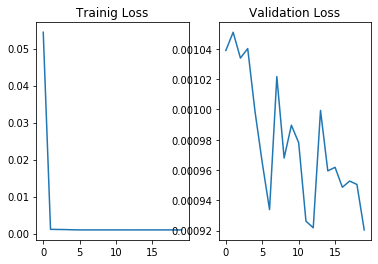

E ([[0.054396371399719284, 0.0011449073072521156, 0.001103832142120549, 0.001083727170135038, 0.001017036495171823, 0.0009889210707365514, 0.0009876191497563641, 0.0009858241338014365, 0.0009913756558125374, 0.0009888145712044312, 0.0009885601057105968, 0.0009865077171525131, 0.0009897743589393129, 0.0009890721938062947, 0.0009871455000437076, 0.000990449858122089, 0.0009894103547173681, 0.0009850548321660585, 0.000986692345725227, 0.0009902899570010091]], [[0.0010389342424914957, 0.0010509670616981861, 0.0010339120634761778, 0.0010401863671277466, 0.0009987587347443639, 0.00096471448395863, 0.0009338298594526367, 0.0010216778970038873, 0.0009679493007768977, 0.0009895591176567956, 0.0009780186845518557, 0.0009261879344648704, 0.0009218144773879123, 0.0009993340750780496, 0.0009594009990218543, 0.0009617600481437201, 0.0009485805223325709, 0.0009526745850520506, 0.00095043089458559, 0.0009204138312262188]], [[0.0031608036624997033, 0.003190454728752046, 0.0031904547288625048, 0.0031904

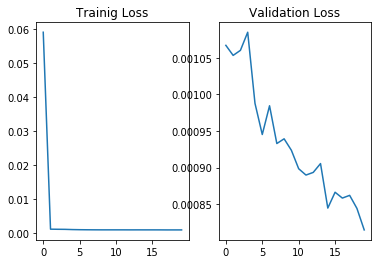

E ([[0.054396371399719284, 0.0011449073072521156, 0.001103832142120549, 0.001083727170135038, 0.001017036495171823, 0.0009889210707365514, 0.0009876191497563641, 0.0009858241338014365, 0.0009913756558125374, 0.0009888145712044312, 0.0009885601057105968, 0.0009865077171525131, 0.0009897743589393129, 0.0009890721938062947, 0.0009871455000437076, 0.000990449858122089, 0.0009894103547173681, 0.0009850548321660585, 0.000986692345725227, 0.0009902899570010091], [0.05903285495066825, 0.0011318277306008831, 0.0011021160868362441, 0.001081474126133643, 0.001014834933099533, 0.0009782247551840511, 0.000958034216445113, 0.0009431267015268448, 0.0009351727437956286, 0.0009345335967019911, 0.0009339941927093952, 0.0009335893167985706, 0.0009281343630559819, 0.0009314444807200704, 0.0009281643488919073, 0.0009290044996309857, 0.0009249265465378582, 0.0009144107722244623, 0.0009157578002398994, 0.0009165770040346303]], [[0.0010389342424914957, 0.0010509670616981861, 0.0010339120634761778, 0.001040186

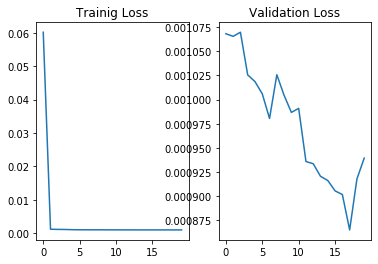

E ([[0.054396371399719284, 0.0011449073072521156, 0.001103832142120549, 0.001083727170135038, 0.001017036495171823, 0.0009889210707365514, 0.0009876191497563641, 0.0009858241338014365, 0.0009913756558125374, 0.0009888145712044312, 0.0009885601057105968, 0.0009865077171525131, 0.0009897743589393129, 0.0009890721938062947, 0.0009871455000437076, 0.000990449858122089, 0.0009894103547173681, 0.0009850548321660585, 0.000986692345725227, 0.0009902899570010091], [0.05903285495066825, 0.0011318277306008831, 0.0011021160868362441, 0.001081474126133643, 0.001014834933099533, 0.0009782247551840511, 0.000958034216445113, 0.0009431267015268448, 0.0009351727437956286, 0.0009345335967019911, 0.0009339941927093952, 0.0009335893167985706, 0.0009281343630559819, 0.0009314444807200704, 0.0009281643488919073, 0.0009290044996309857, 0.0009249265465378582, 0.0009144107722244623, 0.0009157578002398994, 0.0009165770040346303], [0.06020337478071261, 0.0011508088702174618, 0.0010957573188117467, 0.0010766280903

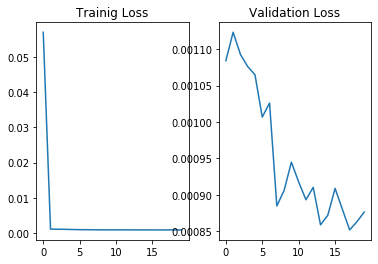

E ([[0.054396371399719284, 0.0011449073072521156, 0.001103832142120549, 0.001083727170135038, 0.001017036495171823, 0.0009889210707365514, 0.0009876191497563641, 0.0009858241338014365, 0.0009913756558125374, 0.0009888145712044312, 0.0009885601057105968, 0.0009865077171525131, 0.0009897743589393129, 0.0009890721938062947, 0.0009871455000437076, 0.000990449858122089, 0.0009894103547173681, 0.0009850548321660585, 0.000986692345725227, 0.0009902899570010091], [0.05903285495066825, 0.0011318277306008831, 0.0011021160868362441, 0.001081474126133643, 0.001014834933099533, 0.0009782247551840511, 0.000958034216445113, 0.0009431267015268448, 0.0009351727437956286, 0.0009345335967019911, 0.0009339941927093952, 0.0009335893167985706, 0.0009281343630559819, 0.0009314444807200704, 0.0009281643488919073, 0.0009290044996309857, 0.0009249265465378582, 0.0009144107722244623, 0.0009157578002398994, 0.0009165770040346303], [0.06020337478071261, 0.0011508088702174618, 0.0010957573188117467, 0.0010766280903

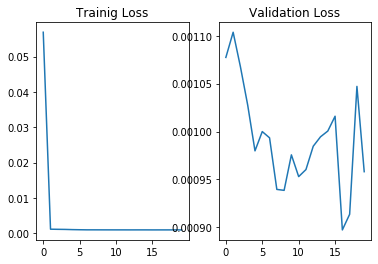

E ([[0.054396371399719284, 0.0011449073072521156, 0.001103832142120549, 0.001083727170135038, 0.001017036495171823, 0.0009889210707365514, 0.0009876191497563641, 0.0009858241338014365, 0.0009913756558125374, 0.0009888145712044312, 0.0009885601057105968, 0.0009865077171525131, 0.0009897743589393129, 0.0009890721938062947, 0.0009871455000437076, 0.000990449858122089, 0.0009894103547173681, 0.0009850548321660585, 0.000986692345725227, 0.0009902899570010091], [0.05903285495066825, 0.0011318277306008831, 0.0011021160868362441, 0.001081474126133643, 0.001014834933099533, 0.0009782247551840511, 0.000958034216445113, 0.0009431267015268448, 0.0009351727437956286, 0.0009345335967019911, 0.0009339941927093952, 0.0009335893167985706, 0.0009281343630559819, 0.0009314444807200704, 0.0009281643488919073, 0.0009290044996309857, 0.0009249265465378582, 0.0009144107722244623, 0.0009157578002398994, 0.0009165770040346303], [0.06020337478071261, 0.0011508088702174618, 0.0010957573188117467, 0.0010766280903

In [26]:
if __name__ == "__main__":
  _ = train_val_model()
  for el in _ : print("E",el)
  

In [0]:
#print(history.history.keys())

In [0]:
def calculate_wmae(y_predictions,y_truth,wmae_feature):
  wmae = np.zeros(y_predictions.shape)
  y_truth = y_truth.reshape(-1,1)
  #print(y_predictions.shape, y_train.shape)
  for i in range(len(y_predictions)):
    if wmae_feature[i] == 1:
      wmae[i] = 5*np.absolute(y[i]-y_predictions[i])
    else:
      wmae[i] = np.absolute(y[i]-y_predictions[i])
      
  wmae_feature = np.where(wmae_feature==1,5,wmae_feature)
  wmae_feature = np.where(wmae_feature==0,1,wmae_feature)
  return np.sum(wmae)/np.sum(wmae_feature)

In [0]:
pkl_filename = "Keras_pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
  trained_model = pickle.load(file)

In [0]:
y_predictions = trained_model.predict(X)

In [30]:
print(calculate_wmae(y_predictions,y,wmae_feature))

0.020001730697366764
